<center><h1>QBUS6860 - Visual Data Analytics</h1></center>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Loading the data with pandas


In [2]:
df=pd.read_csv('finset.csv')

#check data, which loaded
#short option check: print first 5 rows of data
df.head()

,sector,marketcap,anrevenue,size,roi
0,telecom,12,1.0,250,8
1,telecom,18,1.5,5000,5
2,manufacturing,60,2.0,5000,9
3,retail,20,3.0,50,10
4,retail,25,2.0,250,11


We will set <code>cid</code> as DataFrame index, as it is in column 0, so we use <code>index_col=0</code>. 

There are some missing values in the dataset which are shown as "??" or "????". As pandas represent missing value as "NaN", we need to tell pandas to replace all "??" or "????" with "NaN". 

In [3]:
#more detailed check
credit_data = pd.read_csv('finset.csv',index_col=0,na_values=["??","????"])
credit_data

,marketcap,anrevenue,size,roi
sector,,,,
telecom,12,1.0,250,8
telecom,18,1.5,5000,5
manufacturing,60,2.0,5000,9
retail,20,3.0,50,10
retail,25,2.0,250,11
...,...,...,...,...
manufacturing,62,10.0,5000,12
manufacturing,67,9.0,5000,12
manufacturing,58,9.5,5000,13


## Step 1: Distinguish Attributes of the Dataset 

Let's check the shape of the dataset

In [4]:
#Learn the shape of the dataset
df.shape


(99, 5)

In [5]:
#learn columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sector     99 non-null     object 
 1   marketcap  99 non-null     int64  
 2   anrevenue  99 non-null     float64
 3   size       99 non-null     int64  
 4   roi        99 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


One column has categorical data and all the other columns are of the numeric type with non-Null entries

Let us get quick statistical summary (missing values are automatically skipped)

In [6]:
df.describe()

,marketcap,anrevenue,size,roi
count,99.000000,99.000000,99.000000,99.000000
mean,38.707071,5.172727,3398.484848,10.080808
std,23.904253,4.356108,2276.997380,9.383743
min,2.000000,0.200000,50.000000,1.000000
25%,14.000000,1.500000,250.000000,4.000000
50%,43.000000,3.000000,5000.000000,9.000000
75%,60.000000,9.050000,5000.000000,12.000000
max,78.000000,14.800000,5000.000000,61.000000


## Step 2: Univariate Analysis

### 1) Check for duplicates  

In [7]:
data = df.drop_duplicates(subset ="sector",)
data

,sector,marketcap,anrevenue,size,roi
0,telecom,12,1.0,250,8
2,manufacturing,60,2.0,5000,9
3,retail,20,3.0,50,10


There are only three unique sectors in our dataset

### 2) Print the count of values for each sector

In [8]:
df.value_counts("sector")

sector
manufacturing    52
telecom          25
retail           22
dtype: int64

### 3) Create plot of individual feature count

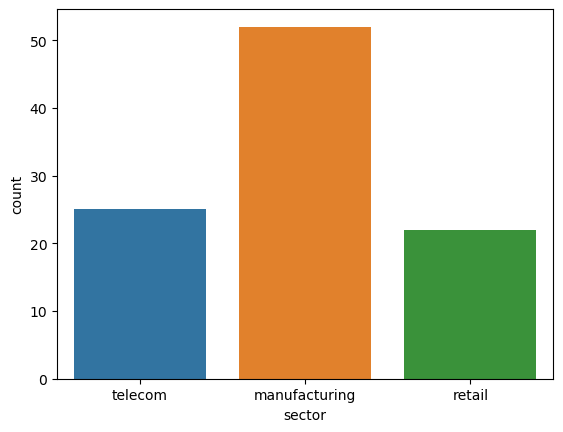

In [9]:
sns.countplot(x='sector', data=df, )
plt.show()
#plt.savefig('Result01.png')

### 4) Plot value distributions for each individual feature  


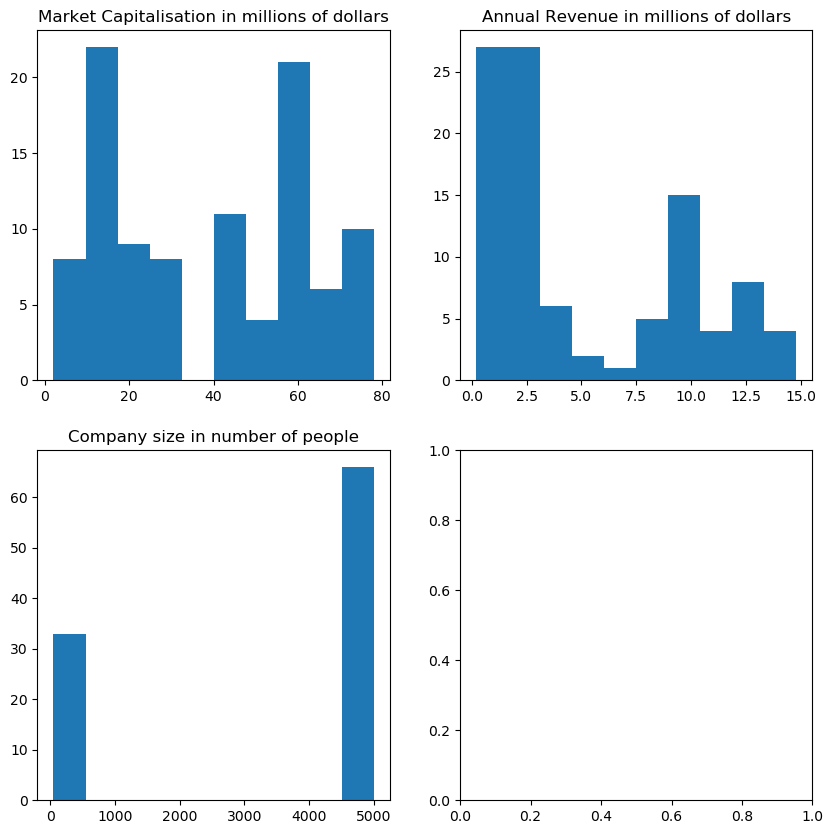

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
fig, axes = plt.subplots(2, 2, figsize=(10,10))
  
axes[0,0].set_title("Market Capitalisation in millions of dollars")
axes[0,0].hist(df['marketcap'], bins=10);
  
axes[0,1].set_title("Annual Revenue in millions of dollars")
axes[0,1].hist(df['anrevenue'], bins=10);
  
axes[1,0].set_title("Company size in number of people")
axes[1,0].hist(df['size'], bins=10);
  
# Add your code to show ROI in percent plot
# 
plt.show()
#plt.savefig('Result02.png')

### 5) Plot each individual feature (colour based on corresponding sector)


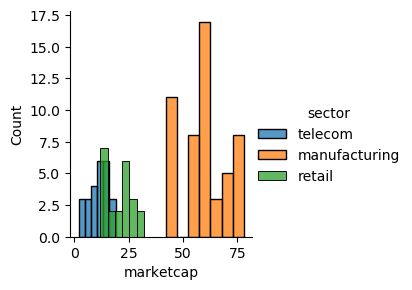

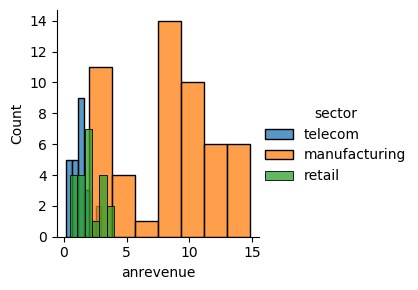

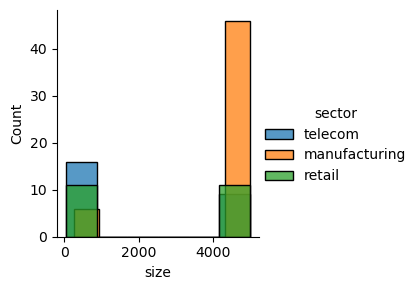

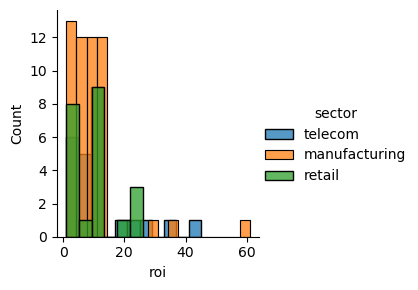

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "marketcap").add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "anrevenue").add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "size").add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "roi").add_legend()
  
plt.show()
#plt.savefig('Result03.png')

### 6) Add distributions to plots (colour based on corresponding sector)

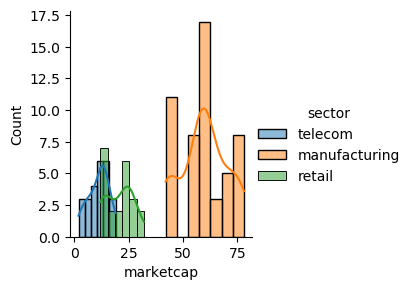

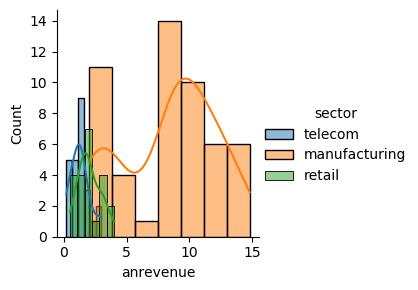

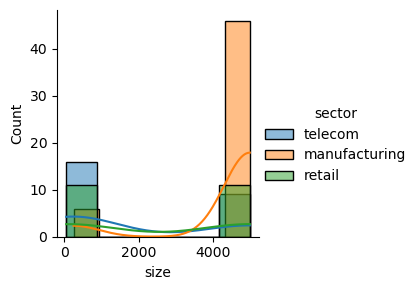

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "marketcap",kde=True).add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "anrevenue",kde=True).add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "size",kde=True).add_legend()
  
# Try to do this for ROI in percent
  
plt.show()
#plt.savefig('Result04.png')

## Step 3: Detect Interactions Among Attributes (Bivariate Analysis)


#### a) compare market capitalisation and annual revenue

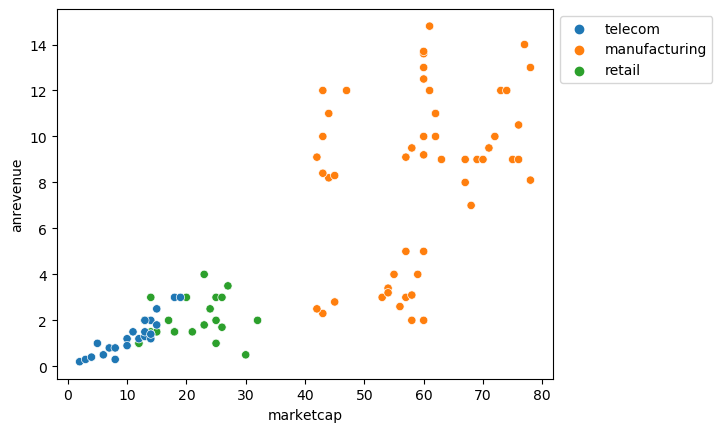

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='marketcap', y='anrevenue',
                hue='sector', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()
#plt.savefig('Result05.png')

Telecom has the smallest market cap and annual revenue

Retail lies in the middle of the other two sectors in terms of marketcap and revenue

Manufacturing has the largest marketcap and annualrevenue


#### b) compare annual revenue and size


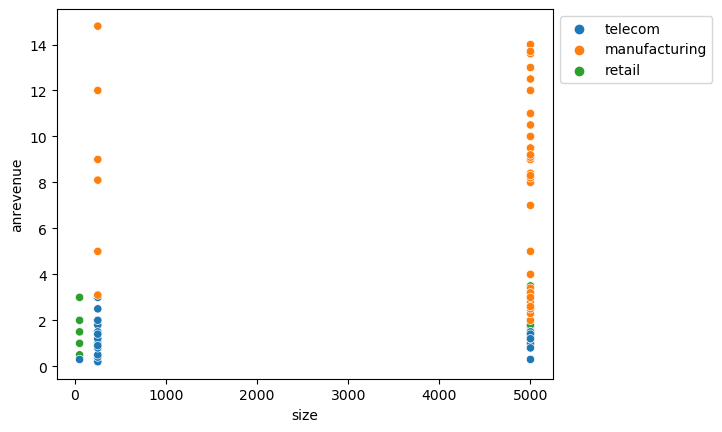

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='size', y='anrevenue',
                hue='sector', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show() 
#plt.savefig('Result06.png')

Retail has the smallest size and annual revenue

Telecom lies in-between the two sectors

Manufacturing tends to have mid and large size companies with relatively high annual revenue

#### c) compare annual revenue and roi 

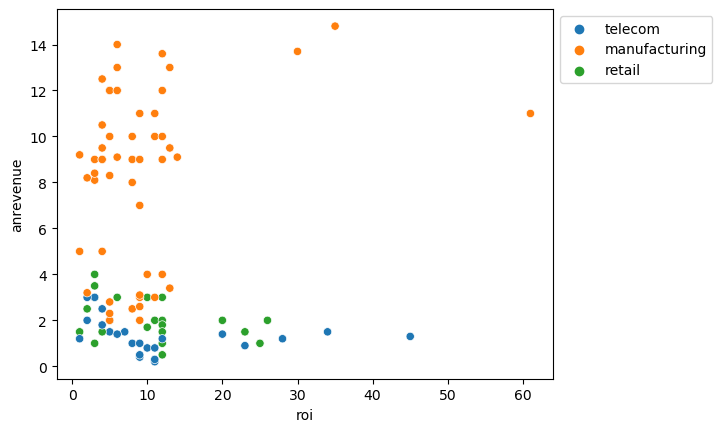

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='roi', y='anrevenue',
                hue='sector', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()
#plt.savefig('Result07.png') 

No particular pattern emerges from the aove graph: no obvious relation between roi and annual revenue

## Step 4: Detect Missing Values

In [16]:
df.isnull().sum()

sector       0
marketcap    0
anrevenue    0
size         0
roi          0
dtype: int64

No column has any missing values

## Step 5: Detect Outliers

### 1) Create box plots by sector

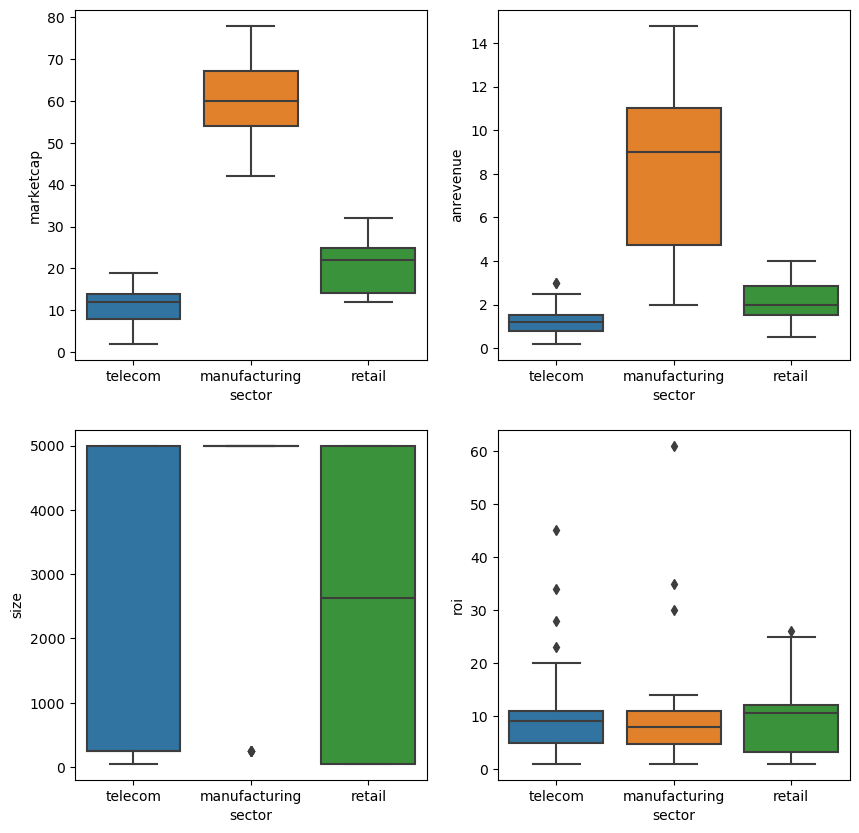

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
  
def graph(y):
    sns.boxplot(x="sector", y=y, data=df)
  
plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('marketcap')
  
plt.subplot(222)
graph('anrevenue')
  
plt.subplot(223)
graph('size')
  
plt.subplot(224)
graph('roi')
  
plt.show()
#plt.savefig('Result10.png')

* Telecom companies have the smallest revenue and tend to have smaller market caps
* Retail companies have medium revenue and market caps
* Manufacturing businesses have largest revenue and market caps

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects.  They can be caused by measurement or execution errors.

### 2) Create box plots for ROI variable

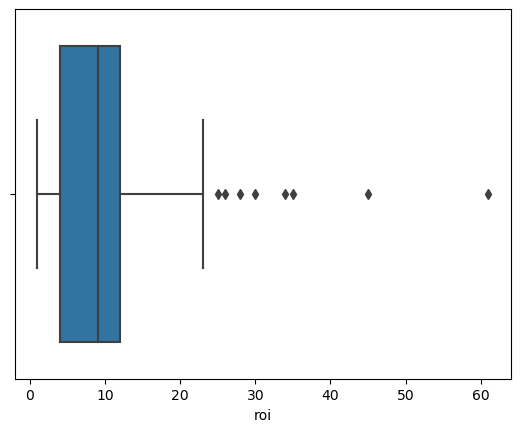

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
  
# Load the dataset
df=pd.read_csv('finset.csv')
  
sns.boxplot(x='roi', data=df)
plt.show()

#plt.savefig('Result11.png')

Values above 22 are outliers. Let's remove them for further analysis. We will use interquartile range method to remove them


### 2) Remove outliers

Old Shape:  (99, 5)
New Shape:  (87, 5)


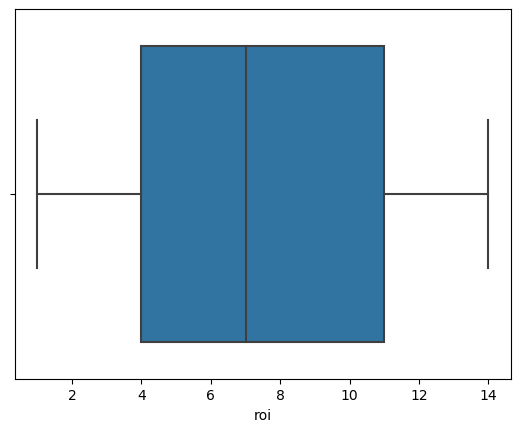

In [19]:
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
  
# Load the dataset
df=pd.read_csv('finset.csv')
  
# IQR
Q1 = np.percentile(df['roi'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(df['roi'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", df.shape)
  
# Upper bound
upper = np.where(df['roi'] >= (Q3+1*IQR))
  
# Lower bound
lower = np.where(df['roi'] <= (Q1-1*IQR))
  
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape)
  
sns.boxplot(x='roi', data=df)
plt.show()

#plt.savefig('Result12.png')



**Success! we have removed outliers**



## Step 6: Feature Engineering

Regression analysis

### a) Correlation between market cap and annual revenue



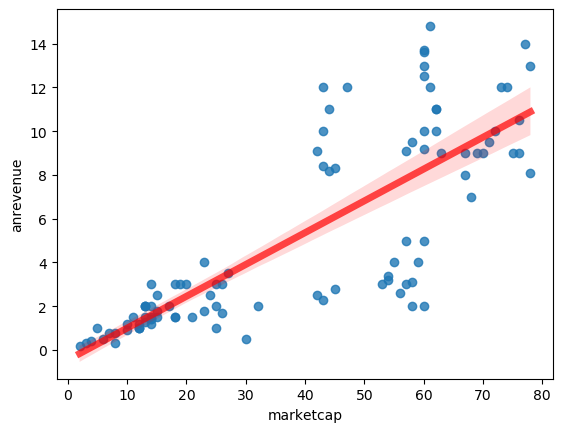

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["marketcap"],y=df["anrevenue"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

#plt.savefig('Result13.png')

### b) Correlation between annual revenue and roi



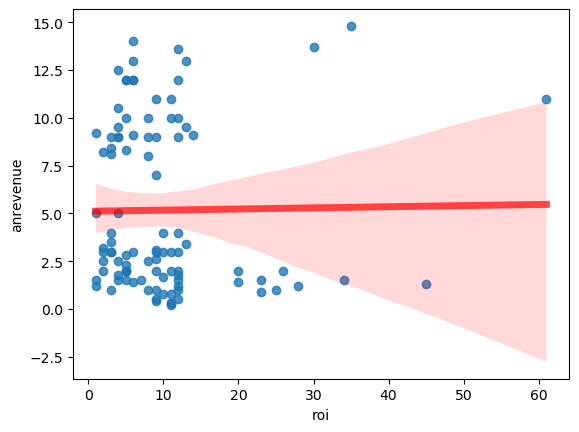

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["roi"],y=df["anrevenue"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

#plt.savefig('Result14.png')

### c) Correlation between annual revenue and size


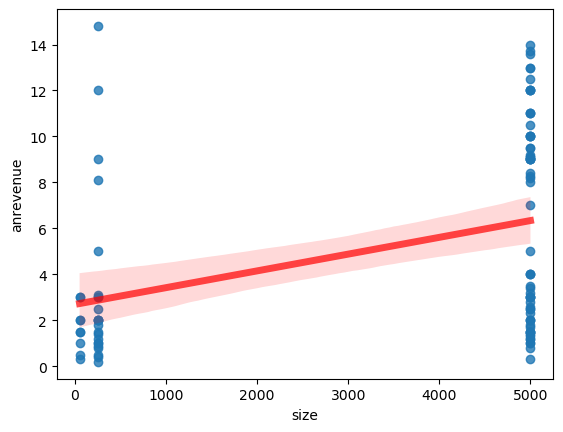

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["size"],y=df["anrevenue"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

#plt.savefig('Result15.png')

### d) Correlation between market cap and roi

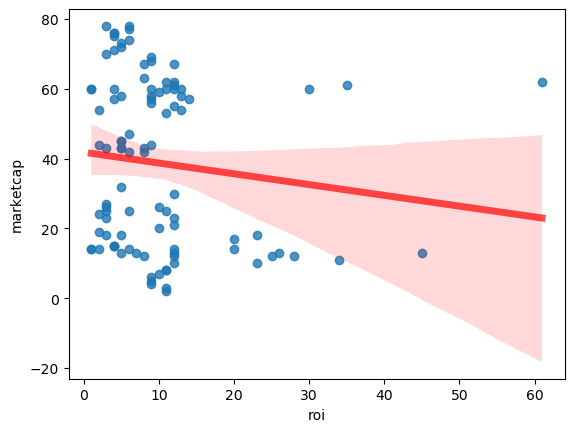

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["roi"],y=df["marketcap"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

#plt.savefig('Result16.png')

### d) Correlation between roi and size


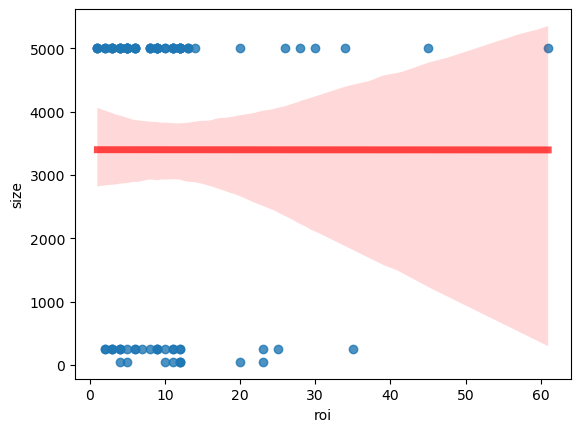

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["roi"],y=df["size"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

#plt.savefig('Result17.png')